<a href="https://colab.research.google.com/github/SiracencoSerghei/Statistics_and_ML/blob/main/2.3_dataNormOutliers/stats_normOutliers_zMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION: Data normalizations and outliers
# Z-score for outlier removal

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels import robust
import scipy.stats as stats

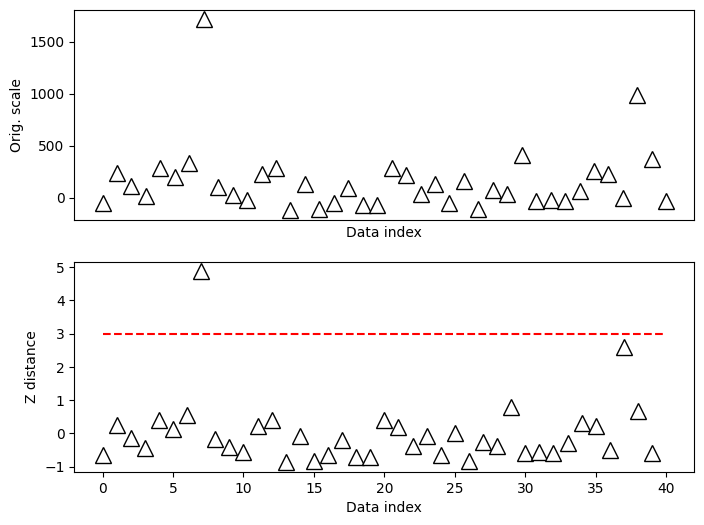

In [3]:
## create some data

N = 40
data = np.random.randn(N)
data[data<-1] = data[data<-1]+2
data[data>2] = data[data>2]**2; # try to force a few outliers
data = data*200 + 50  # change the scale for comparison with z

# convert to z
dataZ = (data-np.mean(data)) / np.std(data)


#### specify the z-score threshold
zscorethresh = 3



# plot the data
fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data,'k^',markerfacecolor='w',markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Orig. scale')

# then plot the zscores
ax[1].plot(dataZ,'k^',markerfacecolor='w',markersize=12)
ax[1].plot([0,N],[zscorethresh,zscorethresh],'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Z distance')
plt.show()

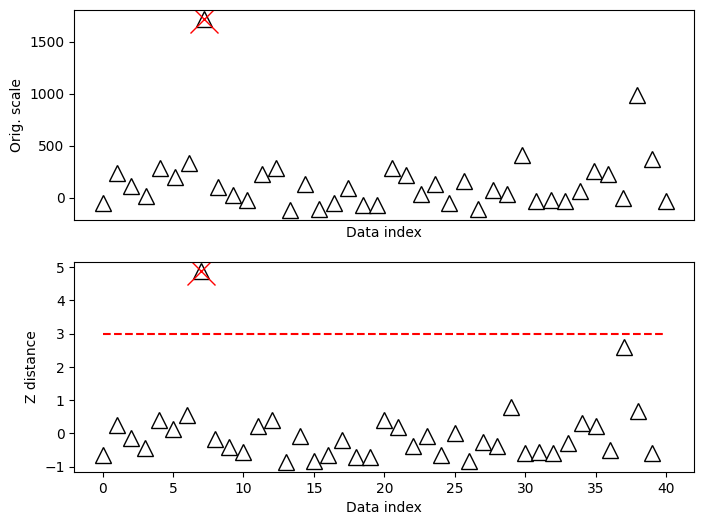

In [4]:
## identify outliers

# find 'em!
outliers = np.where(abs(dataZ)>zscorethresh)[0]

# and cross those out
ax[0].plot(outliers,data[outliers],'x',color='r',markersize=20)
ax[1].plot(outliers,dataZ[outliers],'x',color='r',markersize=20)

fig

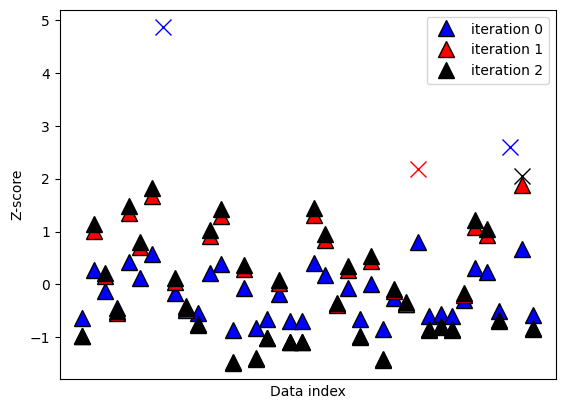

[ 7 29 37 38]


In [5]:
## iterative method

# pick a lenient threshold just for illustration
zscorethresh = 2
dataZ = (data-np.mean(data)) / np.std(data)


colorz = 'brkm'
numiters = 0 # iteration counter
while True:

    # convert to z
    datamean = np.nanmean(dataZ)
    datastd  = np.nanstd(dataZ)
    dataZ = (dataZ-datamean) / datastd

    # find data values to remove
    toremove = dataZ>zscorethresh

    # break out of while loop if no points to remove
    if sum(toremove)==0:
        break
    else:
        # otherwise, mark the outliers in the plot
        plt.plot(np.where(toremove)[0],dataZ[toremove],'%sx'%colorz[numiters],markersize=12)
        dataZ[toremove] = np.nan

    # replot
    plt.plot(dataZ,'k^',markersize=12,markerfacecolor=colorz[numiters],label='iteration %g'%numiters)
    numiters = numiters + 1

plt.xticks([])
plt.ylabel('Z-score')
plt.xlabel('Data index')
plt.legend()
plt.show()

#### the data points to be removed
removeFromOriginal = np.where(np.isnan(dataZ))[0]
print(removeFromOriginal)

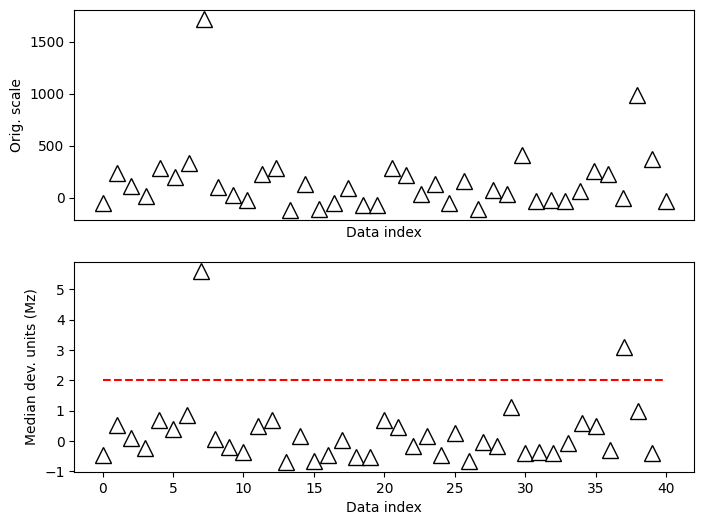

In [6]:
## modified Z for non-normal distributions

# compute modified z
dataMed = np.median(data)
dataMAD = robust.mad(data)

dataMz = stats.norm.ppf(.75)*(data-dataMed) / dataMAD


# plot the data
fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data,'k^',markerfacecolor='w',markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Orig. scale')

# then plot the zscores
ax[1].plot(dataMz,'k^',markerfacecolor='w',markersize=12)
ax[1].plot([0,N],[zscorethresh,zscorethresh],'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Median dev. units (Mz)')
plt.show()

---
# Code challenge: Z-score vs. Modified-Z-score
---

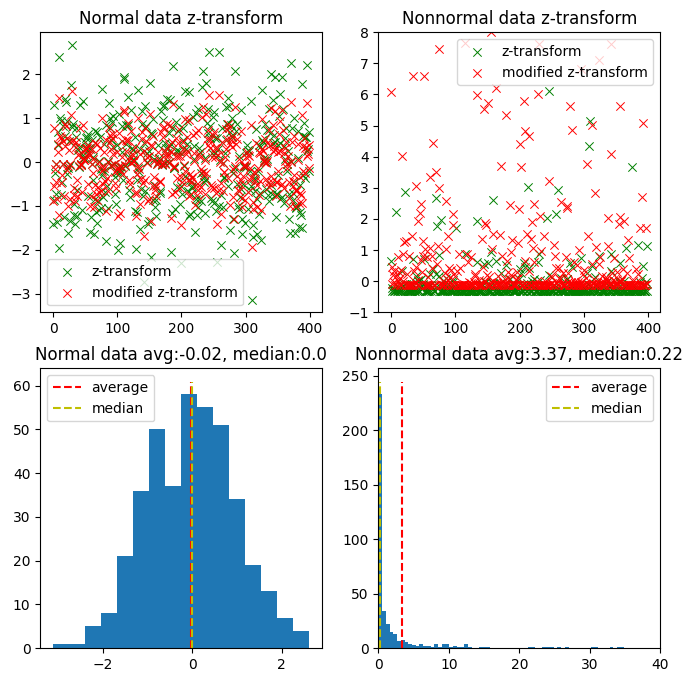

In [7]:

N = 400

rng = np.random.default_rng(12345)

#Create 2 datasets, one normally distributed and the other one right-skewed
data_norm = rng.normal(0, 1, N)
data_nonnorm = rng.normal(0, 1, N)**4

#Compute z-tranformed data
data_normZ = (data_norm - np.mean(data_norm)) / np.std(data_norm, ddof=1)
data_nonnormZ = (data_nonnorm - np.mean(data_nonnorm)) / np.std(data_nonnorm, ddof=1)

#Filter by z-method
# data_nonnormZ = np.where(np.abs(data_nonnormZ) > 3, np.nan, data_nonnormZ)
# print(np.argwhere(np.isnan(data_nonnormZ)))

#Computed Modified z-transformed data
data_norm_mad = robust.mad(data_norm)
data_nonnorm_mad = robust.mad(data_norm)

data_norm_modZ = 0.6745 * (data_norm - np.median(data_norm)) / data_norm_mad
data_nonnorm_modZ = 0.6745 * (data_nonnorm - np.median(data_nonnorm)) / data_nonnorm_mad

fig, ax = plt.subplots(2, 2)

scatter_size = 0.7

ax[0, 0].scatter(range(N), data_normZ, color="g", marker="x", linewidth=scatter_size, label="z-transform")
ax[0, 0].scatter(range(N), data_norm_modZ, color="r", marker="x", linewidth=scatter_size, label="modified z-transform")
ax[0, 0].set_title("Normal data z-transform")
ax[0, 0].legend()

ax[0, 1].scatter(range(N), data_nonnormZ, color="g", marker="x", linewidth=scatter_size, label="z-transform")
ax[0, 1].scatter(range(N), data_nonnorm_modZ, color="r", marker="x", linewidth=scatter_size, label="modified z-transform")
ax[0, 1].set_ylim([-1, 8])
ax[0, 1].legend()
ax[0, 1].set_title("Nonnormal data z-transform")

norm_median = np.median(data_norm)
norm_avg = np.mean(data_norm)
nonnorm_median = np.median(data_nonnorm)
nonnorm_avg = np.mean(data_nonnorm)

ax[1, 0].hist(data_norm, bins="fd")
min_y_norm = ax[1, 0].get_ylim()
ax[1, 0].plot([norm_avg, norm_avg], min_y_norm, "r--", label="average")
ax[1, 0].plot([norm_median, norm_median], min_y_norm, "y--", label="median")
ax[1, 0].legend()
ax[1, 0].set_title(f"Normal data avg:{norm_avg.round(2)}, median:{norm_median.round(2)}")

ax[1, 1].hist(data_nonnorm, bins="fd")
min_y_nonnorm = ax[1, 1].get_ylim()
ax[1, 1].plot([nonnorm_avg, nonnorm_avg], min_y_nonnorm, "r--", label="average")
ax[1, 1].plot([nonnorm_median, nonnorm_median], min_y_nonnorm, "y--", label="median")
ax[1, 1].plot()
ax[1, 1].legend()
ax[1, 1].set_title(f"Nonnormal data avg:{nonnorm_avg.round(2)}, median:{nonnorm_median.round(2)}")
ax[1, 1].set_xlim([0, 40])


fig.set_size_inches(8, 8)
plt.show()

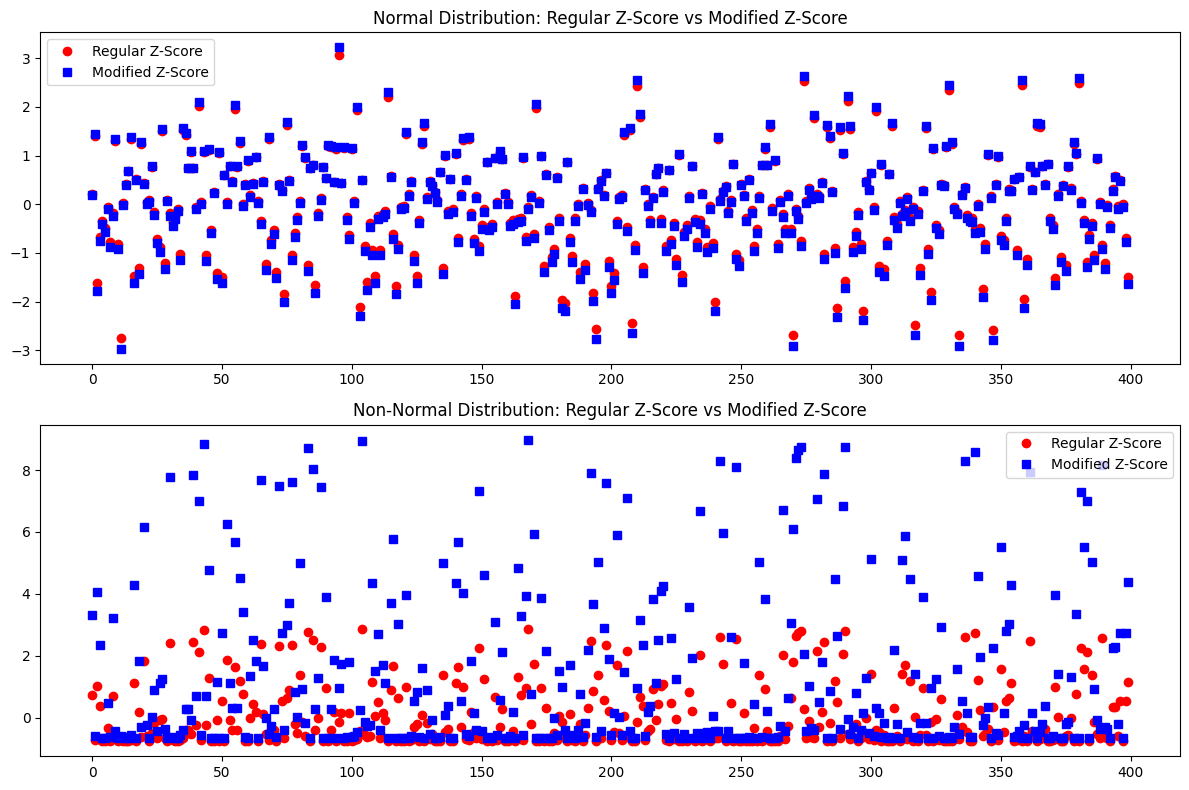

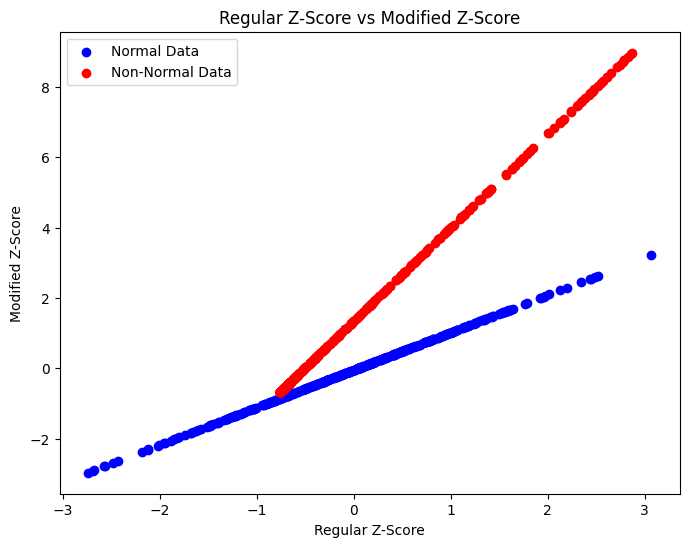

In [8]:

# Step 1: Generate two datasets
N = 400
data_normal = np.random.randn(N)  # Normally distributed random noise
data_non_normal = np.random.rand(N) ** 4  # Skewed (non-normal) distribution

# Step 2: Calculate regular z-scores
z_normal = (data_normal - np.mean(data_normal)) / np.std(data_normal)
z_non_normal = (data_non_normal - np.mean(data_non_normal)) / np.std(data_non_normal)

# Step 3: Calculate modified z-scores (based on MAD)
mad_normal = np.median(np.abs(data_normal - np.median(data_normal)))
mad_non_normal = np.median(np.abs(data_non_normal - np.median(data_non_normal)))

mod_z_normal = 0.6745 * (data_normal - np.median(data_normal)) / mad_normal
mod_z_non_normal = 0.6745 * (data_non_normal - np.median(data_non_normal)) / mad_non_normal

# Step 4: Plot regular z-scores vs modified z-scores
plt.figure(figsize=(12, 8))

# Normal distribution plot
plt.subplot(2, 1, 1)
plt.plot(range(N), z_normal, 'ro', label='Regular Z-Score')
plt.plot(range(N), mod_z_normal, 'bs', label='Modified Z-Score')
plt.title('Normal Distribution: Regular Z-Score vs Modified Z-Score')
plt.legend()

# Non-normal distribution plot
plt.subplot(2, 1, 2)
plt.plot(range(N), z_non_normal, 'ro', label='Regular Z-Score')
plt.plot(range(N), mod_z_non_normal, 'bs', label='Modified Z-Score')
plt.title('Non-Normal Distribution: Regular Z-Score vs Modified Z-Score')
plt.legend()

plt.tight_layout()
plt.show()

# Optional: Plot regular z vs modified z
plt.figure(figsize=(8, 6))
plt.scatter(z_normal, mod_z_normal, color='blue', label='Normal Data')
plt.scatter(z_non_normal, mod_z_non_normal, color='red', label='Non-Normal Data')
plt.title('Regular Z-Score vs Modified Z-Score')
plt.xlabel('Regular Z-Score')
plt.ylabel('Modified Z-Score')
plt.legend()
plt.show()